In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics,model_selection

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
# To model the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# To model the Bagging classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# To model the Boosting classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [9]:
# now we will check the value counts 

In [10]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# As from the above table we can see that there are total 6362620 rows & 10 columns
# The data is about 534 MB its a Huge dataset 
# with all the values as checked there are no null values found.

In [12]:
Proper = len(df[df.isFraud == 0])
print("Number of Proper transactions: ", Proper)

Number of Proper transactions:  6354407


In [13]:
fraud = len(df[df.isFraud == 1])
print("Number of Fraud transactions: ", fraud)

Number of Fraud transactions:  8213


In [14]:
Proper_percent = (Proper / (fraud + Proper)) * 100
print("Percentage of Proper transactions: {:.4f} %".format(Proper_percent))

Percentage of Proper transactions: 99.8709 %


In [15]:
fraud_percent = (fraud / (fraud + Proper)) * 100
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Percentage of Fraud transactions: 0.1291 %


In [16]:
df.select_dtypes(exclude=['object']).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [17]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
color_list=get_colors(13)
color_list

['#fb6a63',
 '#6e4c4e',
 '#5cd914',
 '#fa1164',
 '#b00a41',
 '#c77010',
 '#845413',
 '#65ec6c',
 '#fe152f',
 '#bb87c4',
 '#a29136',
 '#73fc67',
 '#aea998']

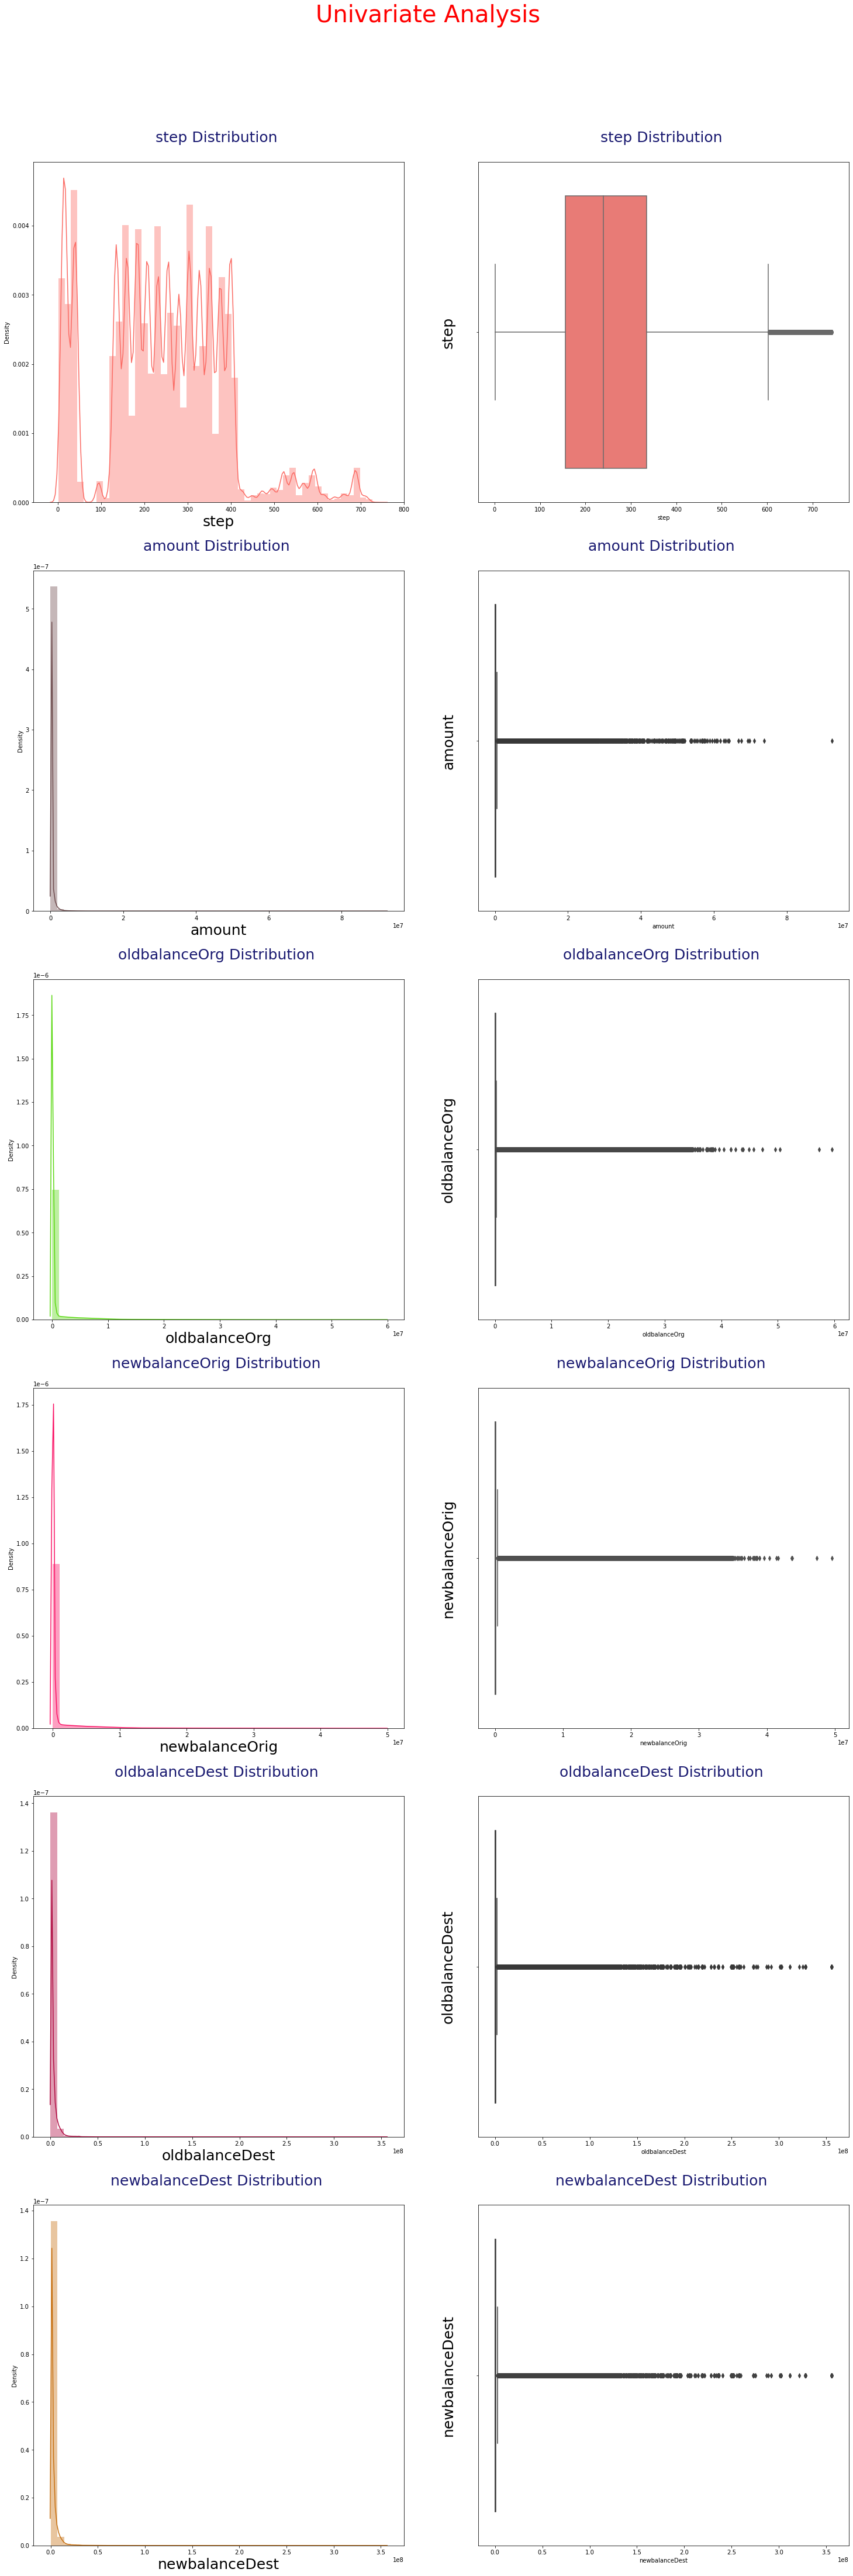

In [18]:
var1=df.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=6,ncols=2)
n=df.select_dtypes(exclude=['object']).columns.size
fig.set_size_inches(25, 75);
plt.suptitle('Univariate Analysis',fontsize=40, color='Red',y=0.93);
for i in range(0,6):
    a = sns.distplot(df[var1].iloc[:,i] , ax=axes[i][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25)
    a = sns.boxplot(df[var1].iloc[:,i] , orient = "v" , ax=axes[i][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+'\n',fontsize=25);

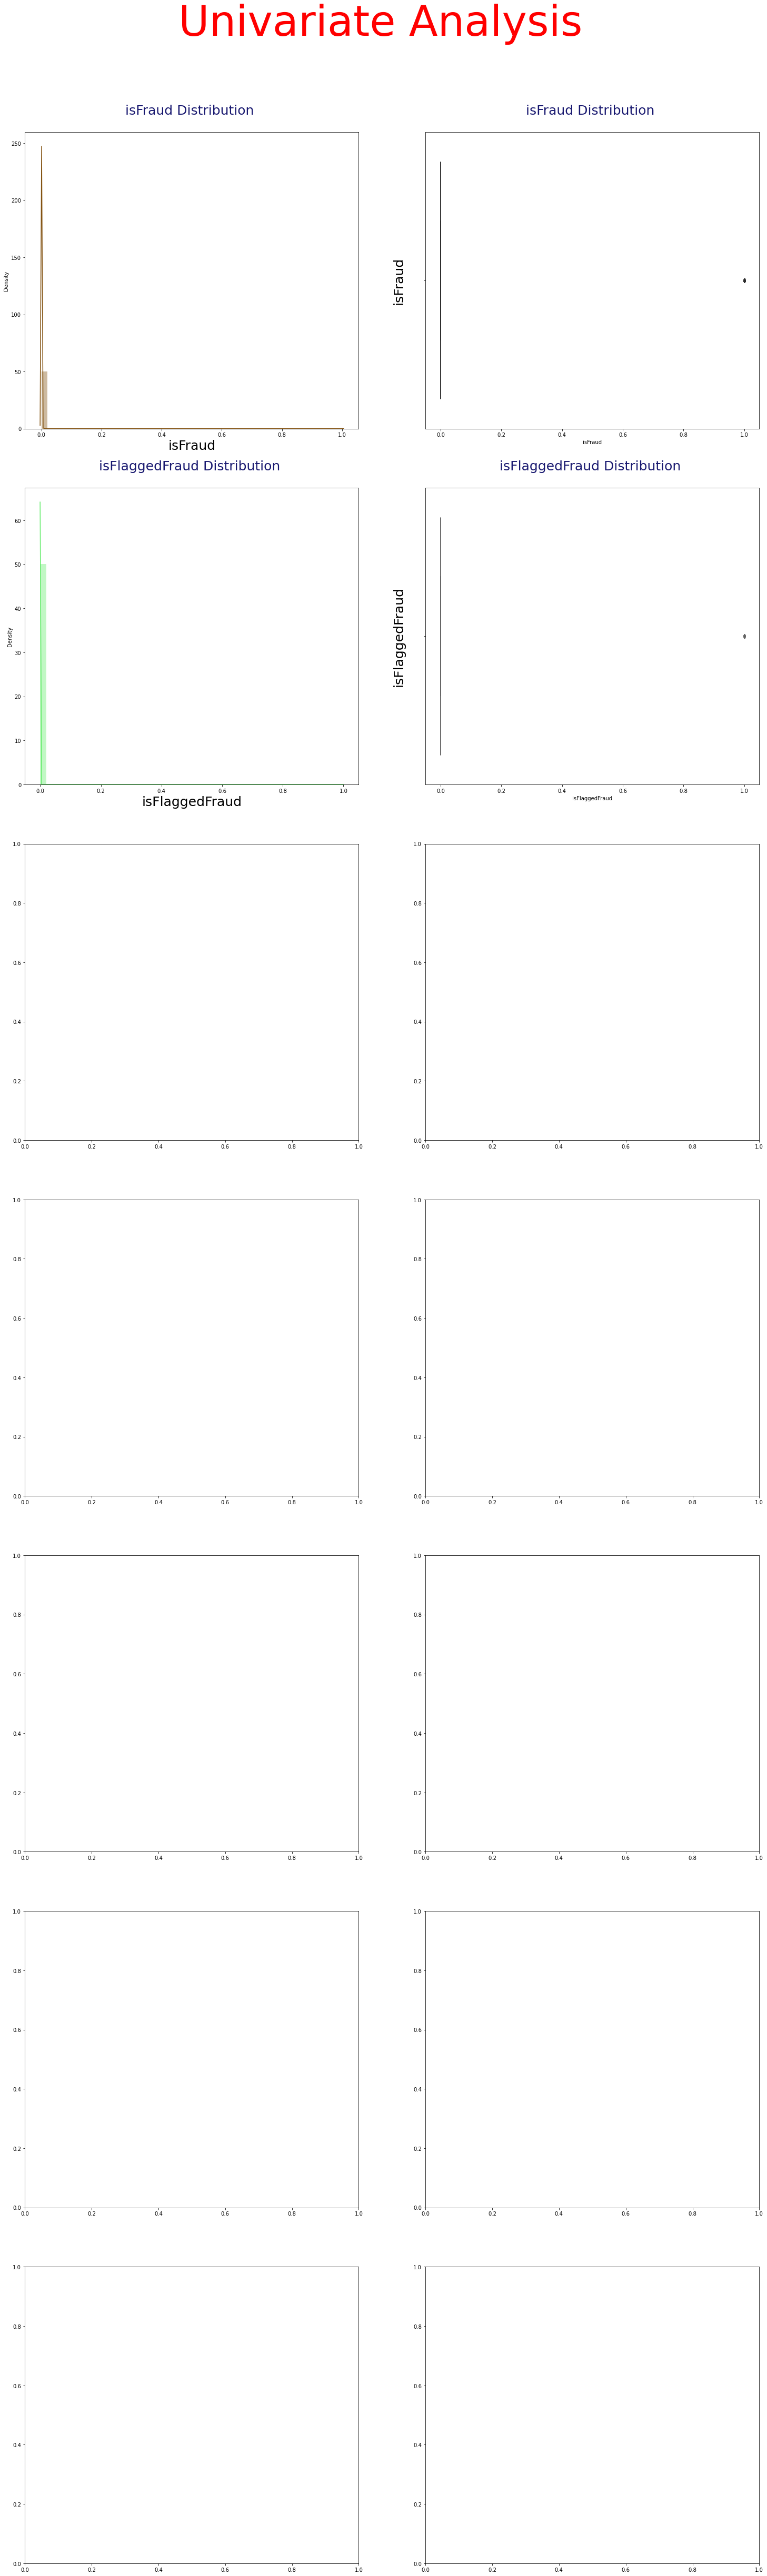

In [19]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 85);
plt.suptitle('Univariate Analysis',fontsize=80, color='Red',y=0.92);
for i in range(6,n):
    a = sns.distplot(df[var1].iloc[:,i] , ax=axes[i-6][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25);
    a = sns.boxplot(df[var1].iloc[:,i] , orient = "v" , ax=axes[i-6][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+"\n",fontsize=25);

In [20]:
df.skew()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [21]:
df.corr(method='pearson')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


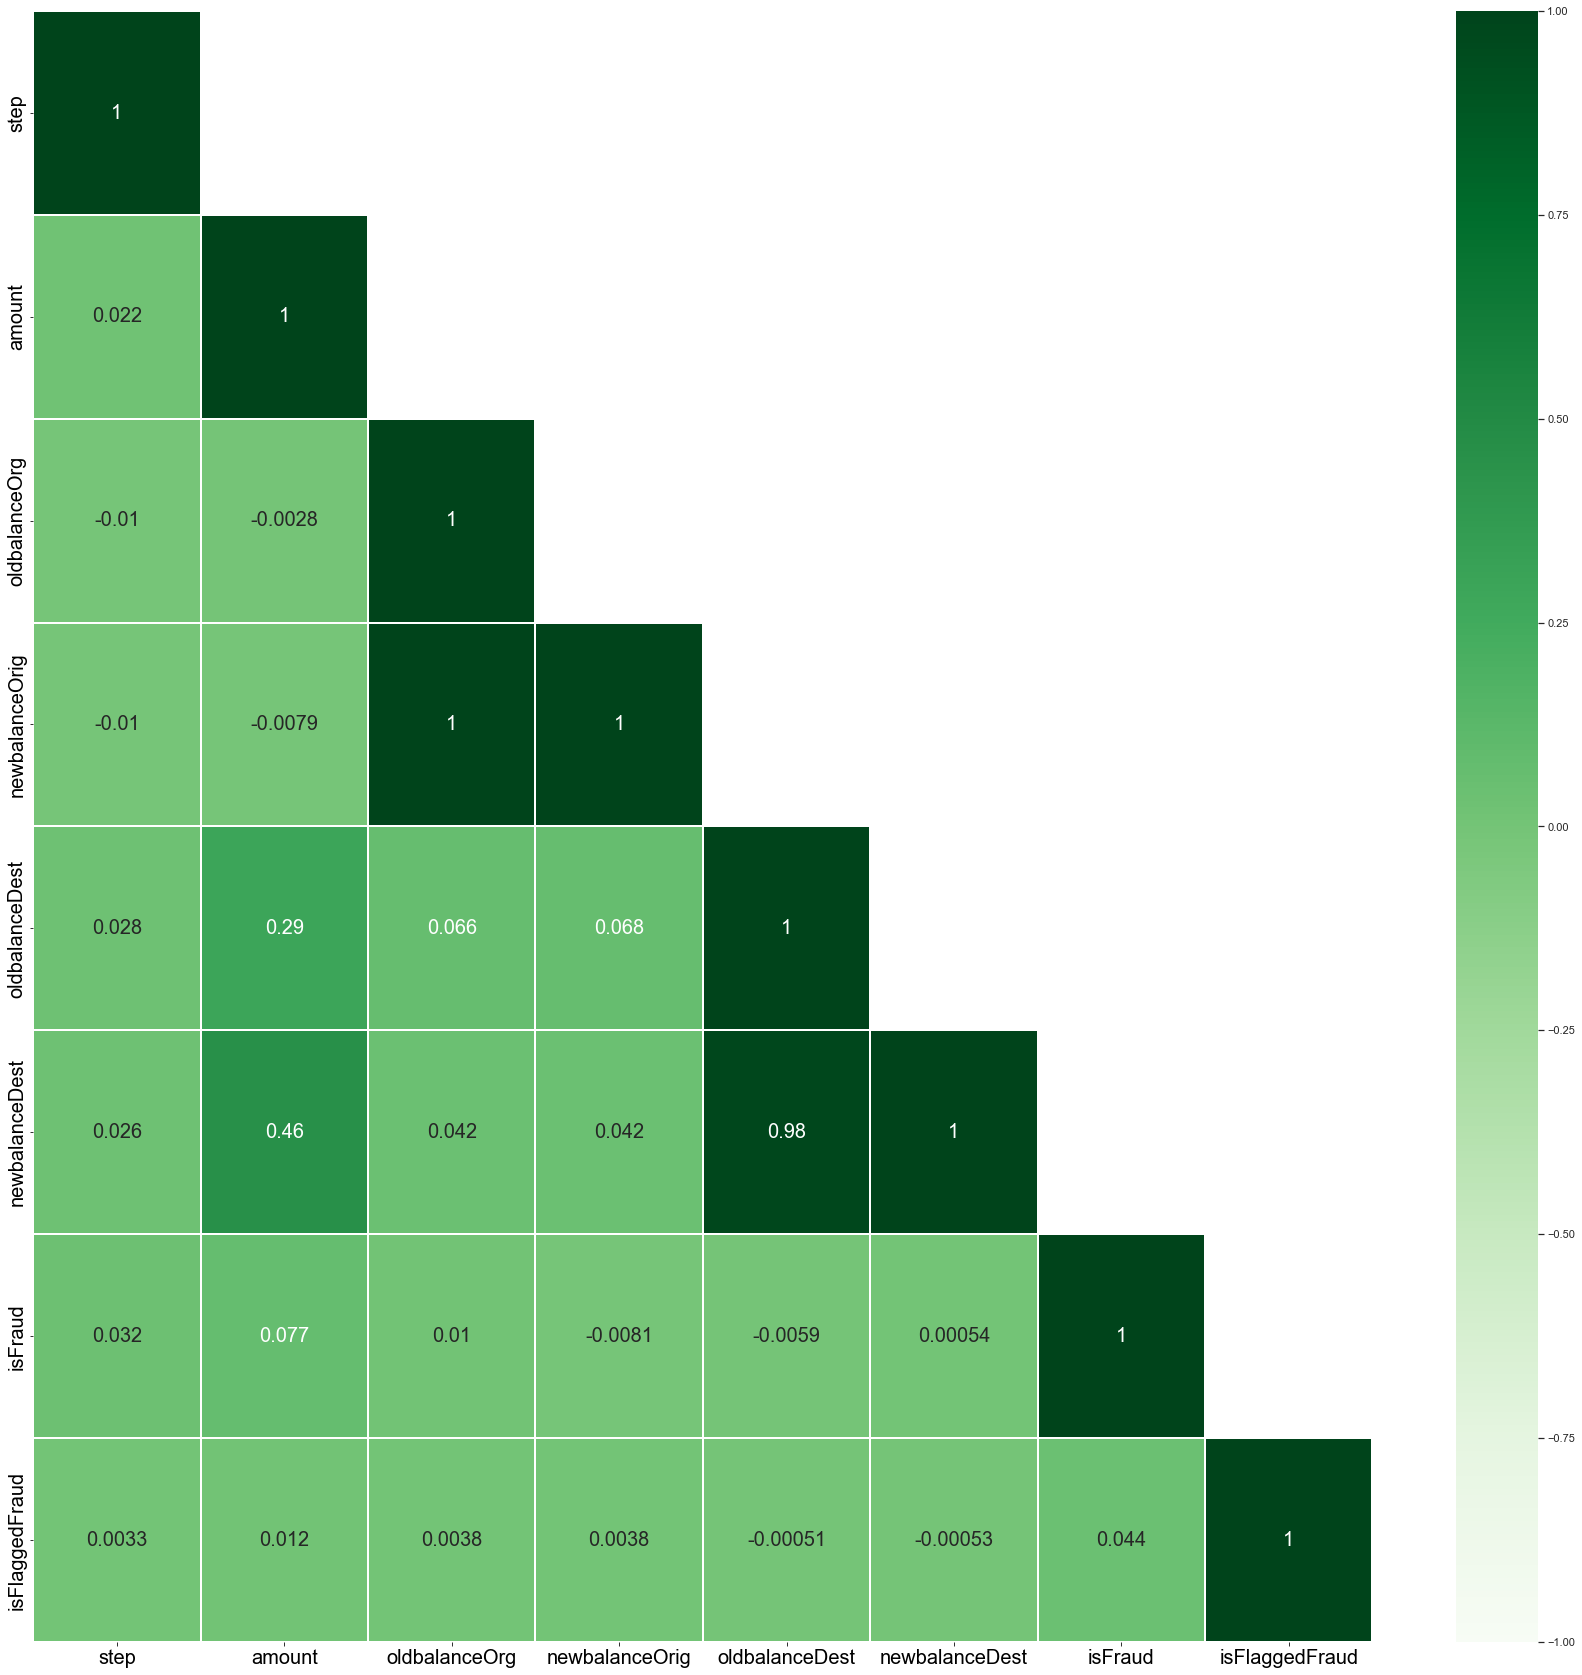

In [22]:
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(cor, mask = mask, annot = True,annot_kws={"size": 20},linewidths=1.5,
            linecolor='white',cmap='Greens', vmin = -1, vmax = 1);
plt.yticks(fontsize="20",va='center');
plt.xticks(fontsize="20",ha='center');
#corr=df.corr()

#plt.figure(figsize=(10,6))
#sns.heatmap(corr,annot=True)

In [ ]:
sns.pairplot(df,hue="isFraud", diag_kind='kde',);

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Proper", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# Train  - Test Split

In [ ]:
dff=df.copy()
dff.head()

In [ ]:
# As seen above we have 3 variables of "object" Datatype

In [ ]:
objList = dff.select_dtypes(include = "object").columns
print (objList)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dff[feat] = le.fit_transform(dff[feat].astype(str))

print (dff.info())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(dff)

# We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated.
#Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.
#Thus combine these pairs of collinear attributes and drop the individual ones.

In [ ]:
dff['Actual_amount_orig'] = dff.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
dff['Actual_amount_dest'] = dff.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
dff['TransactionPath'] = dff.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
dff = dff.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(dff)

In [ ]:
cor = dff.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(cor, mask = mask, annot = True,annot_kws={"size": 20},linewidths=1.5,
            linecolor='white',cmap='Greens', vmin = -1, vmax = 1);
plt.yticks(fontsize="20",va='center');
plt.xticks(fontsize="20",ha='center');


# How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

In [ ]:
import itertools
from collections import Counter
import sklearn.metrics as metrics

# From above we can say that Scaling is necessary 

In [ ]:
scaler = StandardScaler()
dff["NormalizedAmount"] = scaler.fit_transform(dff["amount"].values.reshape(-1, 1))
dff.drop(["amount"], inplace= True, axis= 1)

Y = dff["isFraud"]
X = dff.drop(["isFraud"], axis= 1)

In [ ]:
# As seen above if we normalize the complete dataset we will loose the accuracy and recall of the model.


# Train - Test Split

In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 21)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X.head()

In [ ]:
Y.head()

# DECISION TREE

In [ ]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [40,50], 
    'min_samples_leaf': [5,10,15], 
    'min_samples_split': [15,20,40],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [ ]:
print("Decision Tree Score: ", decision_tree_score)

In [ ]:

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()

In [ ]:
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

In [ ]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

In [ ]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST

In [ ]:


random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
print("Random Forest Score: ", random_forest_score)

In [ ]:

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()

In [ ]:
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

In [ ]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

In [ ]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
# FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
# TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
# FN(Decision Tree) ~ FN(Random Forest)


#Here Random Forest looks good.

#THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

# CONCLUSION

### We have seen that Accuracy of both Random Forest and Decision Tree is equal, although the precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Proper to be left off.If either of the 2 reasons are not fulfilled we may catch the innocent and leave the culprit.
# This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

# Also the reason I have chosen this model is because of highly unbalanced dataset (Proper:99.87 :: Fraud:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

# Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.


# What are the key factors that predict fraudulent customer?

#### The source of request is secured or not ?
#### Is the name of organisation asking for money is legit or not ?
#### Transaction history of vendors.




# What kind of prevention should be adopted while company update its infrastructure?

#### Use smart vertified apps only. 
#### Browse through secured websites. 
#### Use secured internet connections (USE VPN). 
#### Keep your mobile and laptop security updated. 
#### Don't respond to unsolicited calls/SMS(s/E-mails). 
#### If you feel like you have been tricked or security compromised, contact your bank immediately. 




# Assuming these actions have been implemented, how would you determine if they work?


#### Bank sending E-statements. 
#### Customers keeping a check of their account activity. 
#### Always keep a log of your payments.